In [1]:
import numpy as np
import bilby 
import pycbc 
import sys
import matplotlib.pyplot as plt


import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn


In [2]:
import river.data
from river.data.datagenerator import DataGeneratorBilbyFD
from river.data.dataset import DatasetStrainFD
#import river.data.utils as datautils
from river.data.utils import *

from river.models import embedding
from river.models import utils as modelutils

In [3]:
import pickle

In [4]:
from sklearn.decomposition import IncrementalPCA

In [5]:
import sklearn.decomposition 

In [6]:
Nsample = 10
injection_parameters_all = generate_BNS_injection_parameters(
        Nsample,
        a_max=0.1,
        d_min=10,
        d_max=100,
        d_power=2)


Nsample_template = 100
injection_parameters_template = generate_BNS_injection_parameters(
        Nsample_template,
        a_max=0.1,
        d_min=10,
        d_max=100,
        d_power=2)

In [7]:
source_type = 'BNS'
detector_names = ['H1', 'L1', 'V1'] 
duration = 32
f_low = 20
f_ref = 20
sampling_frequency = 2048
waveform_approximant = 'IMRPhenomPv2_NRTidal'
parameter_names = PARAMETER_NAMES_PRECESSINGBNS_BILBY
PSD_type = 'bilby_default' #'zero_noise'
use_sealgw_detector = True

In [8]:
data_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type=PSD_type,
            use_sealgw_detector=use_sealgw_detector)

data_template_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type='zero_noise',
            use_sealgw_detector=use_sealgw_detector)

14:40 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:40 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using bilby_default PSDs to generate data.
Using zero_noise PSDs to generate data.


In [9]:
data_generator.inject_signals(injection_parameters_all, Nsample)
data_template_generator.inject_signals(injection_parameters_template, Nsample_template)

14:40 bilby WARNING : The injected signal has a duration in-band of 97.2s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.2s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.2s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 99.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 99.8s, but the data for detector L1 has a duration

Injecting 0-th signal, 0.0% done
Injecting 1-th signal, 10.0% done
Injecting 2-th signal, 20.0% done
Injecting 3-th signal, 30.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 124.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 124.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 124.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 86.6s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 64.5s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 64.5s, but the data for detector L1 has a durat

Injecting 4-th signal, 40.0% done
Injecting 5-th signal, 50.0% done
Injecting 6-th signal, 60.0% done
Injecting 7-th signal, 70.0% done
Injecting 8-th signal, 80.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.6s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.6s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.6s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 171.2s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 171.2s, but the data for detector L1 has a durati

Injecting 9-th signal, 90.0% done
Injecting 0-th signal, 0.0% done
Injecting 1-th signal, 1.0% done
Injecting 2-th signal, 2.0% done
Injecting 3-th signal, 3.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 142.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 142.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 142.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 100.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 100.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 100.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 119.7s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 119.7s, but the data for detector L1 has a 

Injecting 4-th signal, 4.0% done
Injecting 5-th signal, 5.0% done
Injecting 6-th signal, 6.0% done
Injecting 7-th signal, 7.0% done
Injecting 8-th signal, 8.0% done
Injecting 9-th signal, 9.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 106.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.4s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.4s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 87.2s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 87.2s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 87.2s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 172.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 172.9s, but the data for detector L1 has a dur

Injecting 10-th signal, 10.0% done
Injecting 11-th signal, 11.0% done
Injecting 12-th signal, 12.0% done
Injecting 13-th signal, 13.0% done
Injecting 14-th signal, 14.0% done
Injecting 15-th signal, 15.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 123.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 119.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 119.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 119.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 57.7s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 57.7s, but the data for detector L1 has a du

Injecting 16-th signal, 16.0% done
Injecting 17-th signal, 17.0% done
Injecting 18-th signal, 18.0% done
Injecting 19-th signal, 19.0% done
Injecting 20-th signal, 20.0% done
Injecting 21-th signal, 21.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 121.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 121.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 121.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.4s, but the data for detector L1 has a du

Injecting 22-th signal, 22.0% done
Injecting 23-th signal, 23.0% done
Injecting 24-th signal, 24.0% done
Injecting 25-th signal, 25.0% done
Injecting 26-th signal, 26.0% done
Injecting 27-th signal, 27.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 88.7s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.7s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 57.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 57.0s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 57.0s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.1s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.1s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 88.1s, but the data for detector V1 has a duration

Injecting 28-th signal, 28.0% done
Injecting 29-th signal, 29.0% done
Injecting 30-th signal, 30.0% done
Injecting 31-th signal, 31.0% done
Injecting 32-th signal, 32.0% done
Injecting 33-th signal, 33.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 80.1s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 80.1s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 80.1s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 101.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 101.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 101.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 102.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 102.0s, but the data for detector L1 has a dur

Injecting 34-th signal, 34.0% done
Injecting 35-th signal, 35.0% done
Injecting 36-th signal, 36.0% done
Injecting 37-th signal, 37.0% done
Injecting 38-th signal, 38.0% done
Injecting 39-th signal, 39.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 137.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 137.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 137.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 69.7s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 69.7s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 69.7s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 65.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 65.3s, but the data for detector L1 has a durat

Injecting 40-th signal, 40.0% done
Injecting 41-th signal, 41.0% done
Injecting 42-th signal, 42.0% done
Injecting 43-th signal, 43.0% done
Injecting 44-th signal, 44.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 53.2s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 53.2s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 53.2s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 111.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 111.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 111.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 74.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 74.4s, but the data for detector L1 has a durat

Injecting 45-th signal, 45.0% done
Injecting 46-th signal, 46.0% done
Injecting 47-th signal, 47.0% done
Injecting 48-th signal, 48.0% done
Injecting 49-th signal, 49.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 59.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 59.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 59.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 106.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 95.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 95.9s, but the data for detector L1 has a durat

Injecting 50-th signal, 50.0% done
Injecting 51-th signal, 51.0% done
Injecting 52-th signal, 52.0% done
Injecting 53-th signal, 53.0% done
Injecting 54-th signal, 54.0% done
Injecting 55-th signal, 55.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 97.6s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.6s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 97.6s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 131.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 131.3s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 131.3s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 90.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 90.0s, but the data for detector L1 has a durat

Injecting 56-th signal, 56.0% done
Injecting 57-th signal, 57.0% done
Injecting 58-th signal, 58.0% done
Injecting 59-th signal, 59.0% done
Injecting 60-th signal, 60.0% done
Injecting 61-th signal, 61.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 55.5s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 55.5s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 55.5s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 93.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 81.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 81.8s, but the data for detector L1 has a duration

Injecting 62-th signal, 62.0% done
Injecting 63-th signal, 63.0% done
Injecting 64-th signal, 64.0% done
Injecting 65-th signal, 65.0% done
Injecting 66-th signal, 66.0% done
Injecting 67-th signal, 67.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 89.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.0s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 89.0s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 184.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 184.4s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 184.4s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 101.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 101.0s, but the data for detector L1 has a dur

Injecting 68-th signal, 68.0% done
Injecting 69-th signal, 69.0% done
Injecting 70-th signal, 70.0% done
Injecting 71-th signal, 71.0% done
Injecting 72-th signal, 72.0% done
Injecting 73-th signal, 73.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 86.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 86.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 86.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 217.7s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 217.7s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 217.7s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 114.5s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 114.5s, but the data for detector L1 has a dur

Injecting 74-th signal, 74.0% done
Injecting 75-th signal, 75.0% done
Injecting 76-th signal, 76.0% done
Injecting 77-th signal, 77.0% done
Injecting 78-th signal, 78.0% done
Injecting 79-th signal, 79.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 95.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 95.8s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 95.8s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 105.0s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 118.8s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 118.8s, but the data for detector L1 has a dur

Injecting 80-th signal, 80.0% done
Injecting 81-th signal, 81.0% done
Injecting 82-th signal, 82.0% done
Injecting 83-th signal, 83.0% done
Injecting 84-th signal, 84.0% done
Injecting 85-th signal, 85.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 160.9s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 160.9s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 160.9s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 80.5s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 80.5s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 80.5s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector L1 has a durat

Injecting 86-th signal, 86.0% done
Injecting 87-th signal, 87.0% done
Injecting 88-th signal, 88.0% done
Injecting 89-th signal, 89.0% done
Injecting 90-th signal, 90.0% done
Injecting 91-th signal, 91.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 233.1s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 233.1s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 233.1s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 85.5s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 85.5s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 85.5s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 79.3s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 79.3s, but the data for detector L1 has a durat

Injecting 92-th signal, 92.0% done
Injecting 93-th signal, 93.0% done
Injecting 94-th signal, 94.0% done
Injecting 95-th signal, 95.0% done
Injecting 96-th signal, 96.0% done
Injecting 97-th signal, 97.0% done


14:40 bilby WARNING : The injected signal has a duration in-band of 75.0s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 75.0s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 75.0s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 96.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 96.4s, but the data for detector L1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 96.4s, but the data for detector V1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 108.4s, but the data for detector H1 has a duration of 32s
14:40 bilby WARNING : The injected signal has a duration in-band of 108.4s, but the data for detector L1 has a durati

Injecting 98-th signal, 98.0% done
Injecting 99-th signal, 99.0% done


In [10]:
data_generator.numpy_starins()
data_template_generator.numpy_starins()

#data_generator.whiten_strains()
data_template_generator.scale_strains()

In [11]:
n_components=10
ipca_gen = embedding.pca.IPCAGenerator(data_template_generator.data['strains'], n_components, detector_names, decomposition='exp_unwrap')

Generating PCA for H1
Generating PCA for L1
Generating PCA for V1


In [12]:
modelutils.save_model('IPCAgenerator.pickle', ipca_gen)

Model saved to IPCAgenerator.pickle


In [13]:
ipca_gen = modelutils.load_model('IPCAgenerator.pickle')

Model loaded from IPCAgenerator.pickle


In [15]:
ipca_gen.pca_dict['H1']['phase'].singular_values_

array([314619.19632132,  58926.08950742,  34831.30112605,  20679.07646968,
        18076.10708037,  15857.32984058,  11589.31364016,   9517.80405635,
         6073.43481643,   4762.74682154])

In [12]:
ds = DatasetStrainFD(data_dict=data_generator.data, parameter_names=PARAMETER_NAMES_PRECESSINGBNS_BILBY)

In [37]:
proj_angle = np.unwrap(np.angle(strain), axis=-1)


In [38]:
proj_angle.shape

(2, 3, 32129)

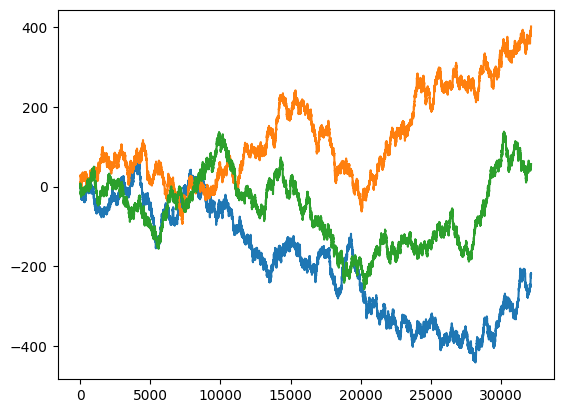

In [39]:
proj_angle = np.unwrap(np.angle(strain), axis=-1)
plt.plot(proj_angle[0][0])
plt.plot(proj_angle[0][1])
plt.plot(proj_angle[0][2])

In [30]:
np.array(list(data_dict['strains'].values()))

torch.Size([3, 32129])

In [13]:
def project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen):
    strain_amp = np.abs(strain)
    strain_phi = np.unwrap(np.angle(strain) , axis=-1)
    n_components = ipca_gen.n_components

    output_amp = []
    output_phi = []
    output_psd = []
    for i,detname in enumerate(detector_names):
        output_amp.append(ipca_gen.project(strain_amp[:,i,:], detname, 'amplitude'))
        output_phi.append(ipca_gen.project(strain_phi[:,i,:], detname, 'phase'))
        output_psd.append(ipca_gen.project(psd[:,i,:], detname, 'amplitude'))
    output_amp = torch.from_numpy(np.array(output_amp))
    output_phi = torch.from_numpy(np.array(output_phi))
    output_psd = torch.from_numpy(np.array(output_psd))

    return torch.cat((output_amp, output_phi, output_psd)).movedim(0,1).float()


In [14]:
theta, strain, psd = ds[0:2]
psd.shape

torch.Size([2, 3, 32129])

In [15]:
theta, strain, psd = ds[0:2]

detector_names = data_generator.detector_names
aa = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)

In [16]:
aa.shape

torch.Size([2, 9, 10])

In [17]:
channel = 'strains'
detname = 'H1'
test_strain = np.abs(data_generator.data[channel][detname])


In [18]:
test_strain[0]

array([2.46418251, 5.80741111, 3.41010129, ..., 0.87508024, 5.1910683 ,
       0.        ])

In [19]:
test_strain.shape

(10, 32129)

In [21]:
ipca_gen.project(test_strain[0:3], detname, 'amplitude')

array([[ 263.63986728,  356.1781637 , -197.52673509, -223.50442216,
        -267.77164892,   26.42598807,  -45.95581484,  -50.34644521,
          16.67646054,  -27.61059529],
       [ 259.61308728,  355.86084139, -196.22575542, -223.03979004,
        -269.45343468,   26.99253454,  -47.12484909,  -48.28805071,
          16.19767271,  -25.07101699],
       [ 265.4990194 ,  354.78352326, -195.57397916, -221.39664796,
        -267.79937652,   24.46985068,  -50.00731192,  -47.61551943,
          18.41949017,  -23.82926359]])

In [15]:
bank_H1 = data_template_generator.data['strains']['H1'].copy()

In [16]:
u,s,vt = np.linalg.svd(bank_H1.T, full_matrices=False)

In [36]:
padding = 0
dialation = 1
kernel_size = 1
stride = 1


10

In [41]:
int((256 + 2*padding - dialation*(kernel_size-1) - 1)/stride) + 1

256

In [60]:
class EmbeddingConv(nn.Module):
    def __init__(self, ndet, ncomp, use_psd = True):
        super().__init__()
        self.ncomp = ncomp
        if use_psd:
            self.nchannel = 3*ndet # strains(2) + PSD (1)
        else:
            self.nchannel = 2*ndet

        self.middle_channel = 512
        self.cnn1 = nn.Sequential(
            nn.Conv1d(in_channels=self.nchannel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )
        
        self.cnn2 = nn.Sequential(
            nn.Conv1d(in_channels=self.middle_channel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )

        self.cnn3 = nn.Sequential(
            nn.Conv1d(in_channels=self.middle_channel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )
        self.dropout = nn.Dropout(0.5)
        self.linear = nn.Linear(self.middle_channel*self.ncomp, 128)


    def forward(self, x):
        # x : [batch_size, channel (det_123, amp/phase) = 2*ndet, length (number of samples)]
        bs,_,_  = x.shape 
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = self.cnn3(x)
        x = self.dropout(x).reshape((bs,-1))
        output = self.linear(x)

        return output

In [61]:
Net_emb = EmbeddingConv(ndet=3, ncomp=n_components)

In [62]:
theta, strain, psd = ds[0:2]
test_input = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)

In [63]:
Net_emb(test_input).shape

torch.Size([2, 128])

In [64]:
test_input.shape

torch.Size([2, 9, 10])